# LAB-6 Binary Classification using Machine Learning and Artificial Neural Networks

In [1]:
# LAB-6: Binary Classification using Machine Learning and Artificial Neural Networks

# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve, auc)
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

2026-02-16 17:19:13.534562: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-16 17:19:30.510855: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-16 17:19:39.344414: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
df = pd.read_csv("loan.csv")

## Exercise 1: Data Understanding and Preprocessing
1. Load the dataset and display its shape, info, and summary statistics.
2. Identify and convert categorical columns using Label Encoding or One-Hot Encoding.
3. Check for missing values or duplicates and handle them appropriately.
4. Normalize/standardize numerical features.
5. Split the data into training and testing sets (80:20).

In [3]:
# 1. Display dataset information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Dataset Shape: (30000, 25)

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  

In [4]:
# 2. Check for missing values and duplicates
print("Missing Values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

# 3. Convert categorical columns using One-Hot Encoding
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 4. Normalize numerical features
from sklearn.preprocessing import StandardScaler
numerical_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# 5. Split the data into training and testing sets (80:20)
X = df_encoded.drop('default.payment.next.month', axis=1)
y = df_encoded['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set size:", X_train.shape)
print("Test set size:", X_test.shape)

Missing Values:
 ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Duplicates: 0

Training set size: (24000, 31)
Test set size: (6000, 31)


## Exercise 2: Machine Learning Model Training and Evaluation
Train the following classifiers to predict default.payment.next.month:
- Logistic Regression with regularization
- K-Nearest Neighbors (use elbow method to choose optimal K)
- Decision Tree Classifier
- Random Forest Classifier
- Support Vector Machine (SVM)

For each model:
- Train the model using the training set
- Predict on the testing set
- Evaluate using: Confusion Matrix, Accuracy, Precision, Recall, F1-Score, ROC AUC Score
- Plot the ROC curve
- Use classification report to summarize results

In [5]:
# 1. Logistic Regression with regularization
logreg = LogisticRegression(max_iter=1000, C=1.0, penalty='l2', solver='liblinear')
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# 2. KNN with optimal K using elbow method
error_rate = []
k_range = range(1, 31)
for i in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=i)
    knn_temp.fit(X_train, y_train)
    pred_i = knn_temp.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

optimal_k = error_rate.index(min(error_rate)) + 1
print(f"Optimal K value: {optimal_k}")

knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# 3. Decision Tree with pruning
dtree = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

# 4. Random Forest with optimized parameters
rf = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_split=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 5. SVM with optimized parameters
svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

Optimal K value: 30


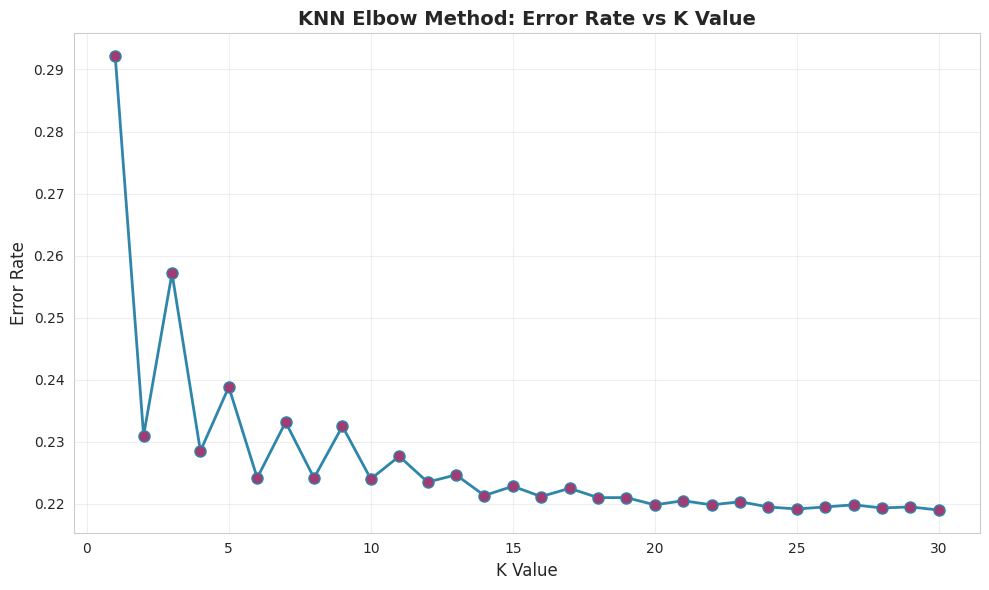

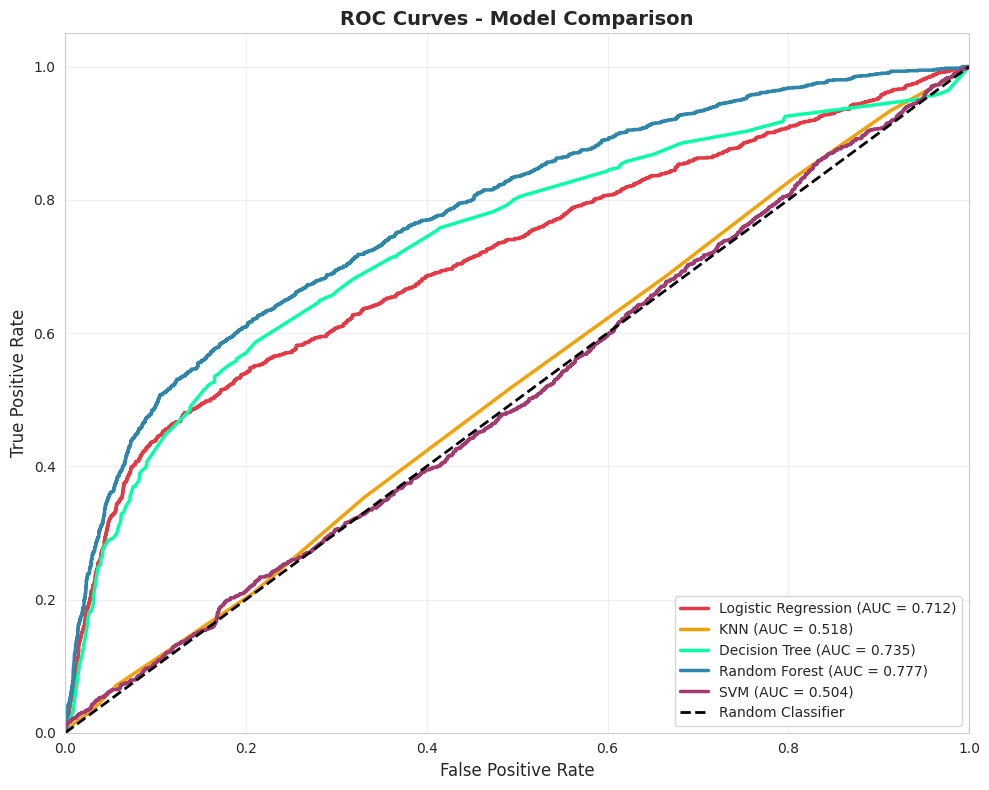

In [6]:
# Visualize KNN Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, error_rate, color='#2E86AB', linestyle='-', marker='o',
         markerfacecolor='#A23B72', markersize=8, linewidth=2)
plt.title('KNN Elbow Method: Error Rate vs K Value', fontsize=14, fontweight='bold')
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ROC Curve for all models
models = {
    "Logistic Regression": (logreg.predict_proba(X_test)[:, 1]),
    "KNN": (knn.predict_proba(X_test)[:, 1]),
    "Decision Tree": (dtree.predict_proba(X_test)[:, 1]),
    "Random Forest": (rf.predict_proba(X_test)[:, 1]),
    "SVM": (svm.predict_proba(X_test)[:, 1])
}

plt.figure(figsize=(10, 8))
colors = ['#E63946', '#F1A208', '#06FFA5', '#2E86AB', '#A23B72']
for (name, y_scores), color in zip(models.items(), colors):
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2.5, color=color)

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [7]:
# Model Performance Metrics
models_report = {
    "Logistic Regression": y_pred_logreg,
    "KNN": y_pred_knn,
    "Decision Tree": y_pred_dtree,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm
}

for name, y_pred in models_report.items():
    print(f"\n{name}:")
    print("-" * 50)
    print(classification_report(y_test, y_pred, target_names=['No Default', 'Default']))


Logistic Regression:
--------------------------------------------------
              precision    recall  f1-score   support

  No Default       0.81      0.97      0.89      4687
     Default       0.68      0.19      0.30      1313

    accuracy                           0.80      6000
   macro avg       0.74      0.58      0.59      6000
weighted avg       0.78      0.80      0.76      6000


KNN:
--------------------------------------------------
              precision    recall  f1-score   support

  No Default       0.78      1.00      0.88      4687
     Default       0.33      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.56      0.50      0.44      6000
weighted avg       0.68      0.78      0.69      6000


Decision Tree:
--------------------------------------------------
              precision    recall  f1-score   support

  No Default       0.83      0.93      0.88      4687
     Default       0.59      0.34      0

## Exercise 3: Deep Learning Model – Artificial Neural Network
Design a simple Feedforward Artificial Neural Network (ANN) for binary classification.

Steps:
1. Import required deep learning libraries (TensorFlow/Keras)
2. Define a Sequential ANN model
3. Add: Input layer, At least one hidden layer with ReLU activation, Output layer with Sigmoid activation
4. Compile the model using: Loss: Binary Cross Entropy, Optimizer: Adam, Metrics: Accuracy
5. Train the model using the training data
6. Evaluate the model on the test dataset
7. Plot training accuracy and loss curves

2026-02-16 17:21:38.889541: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Test Accuracy: 0.8175
Test Loss: 0.4449


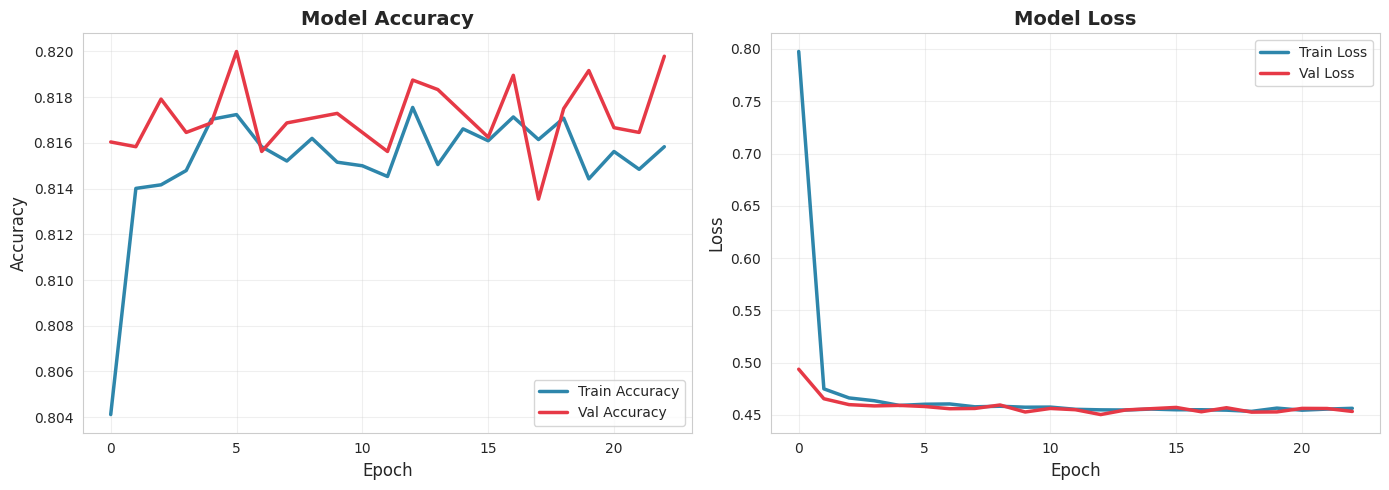

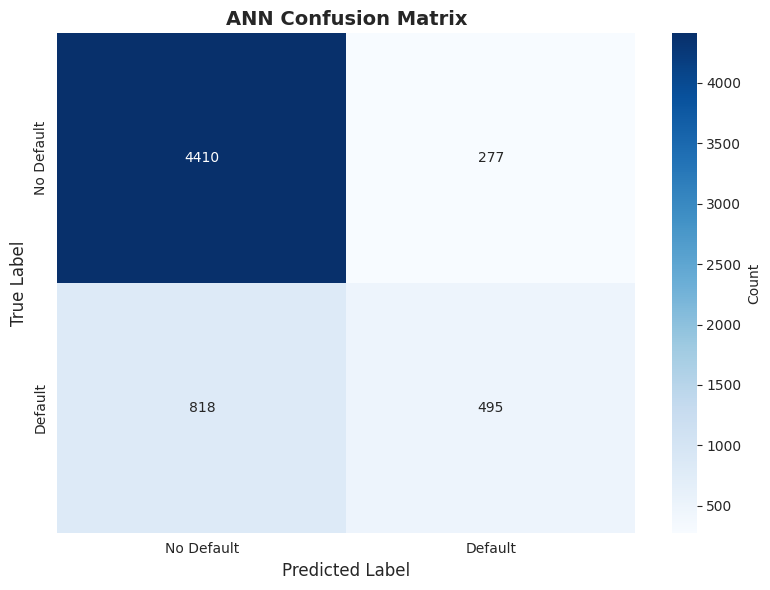


Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

  No Default       0.84      0.94      0.89      4687
     Default       0.64      0.38      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [8]:
# Scale data for ANN
from sklearn.preprocessing import StandardScaler
scaler_ann = StandardScaler()
X_train_scaled = scaler_ann.fit_transform(X_train)
X_test_scaled = scaler_ann.transform(X_test)

# Define ANN architecture
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), 
                 kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2.5, color='#2E86AB')
ax1.plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2.5, color='#E63946')
ax1.set_title('Model Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Loss plot
ax2.plot(history.history['loss'], label='Train Loss', linewidth=2.5, color='#2E86AB')
ax2.plot(history.history['val_loss'], label='Val Loss', linewidth=2.5, color='#E63946')
ax2.set_title('Model Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Confusion Matrix
y_pred_ann = (model.predict(X_test_scaled, verbose=0).flatten() > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_ann)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'],
            cbar_kws={'label': 'Count'})
plt.title('ANN Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Classification Report
print("\nClassification Report:")
print("-" * 50)
print(classification_report(y_test, y_pred_ann, target_names=['No Default', 'Default']))

## Exercise 4: Model Comparison
Create a performance table comparing all models using the following metrics:
- Accuracy
- Precision
- Recall
- F1-Score
- ROC AUC


Performance Comparison Table:
              Model  Accuracy  Precision   Recall  F1-Score  ROC AUC
Logistic Regression  0.803167   0.676471 0.192688  0.299941 0.711543
                KNN  0.781000   0.333333 0.000762  0.001520 0.517529
      Decision Tree  0.803167   0.586842 0.339680  0.430294 0.735071
      Random Forest  0.821000   0.669024 0.360244  0.468317 0.777073
                SVM  0.781167   0.000000 0.000000  0.000000 0.503965
                ANN  0.817500   0.641192 0.376999  0.474820 0.774372


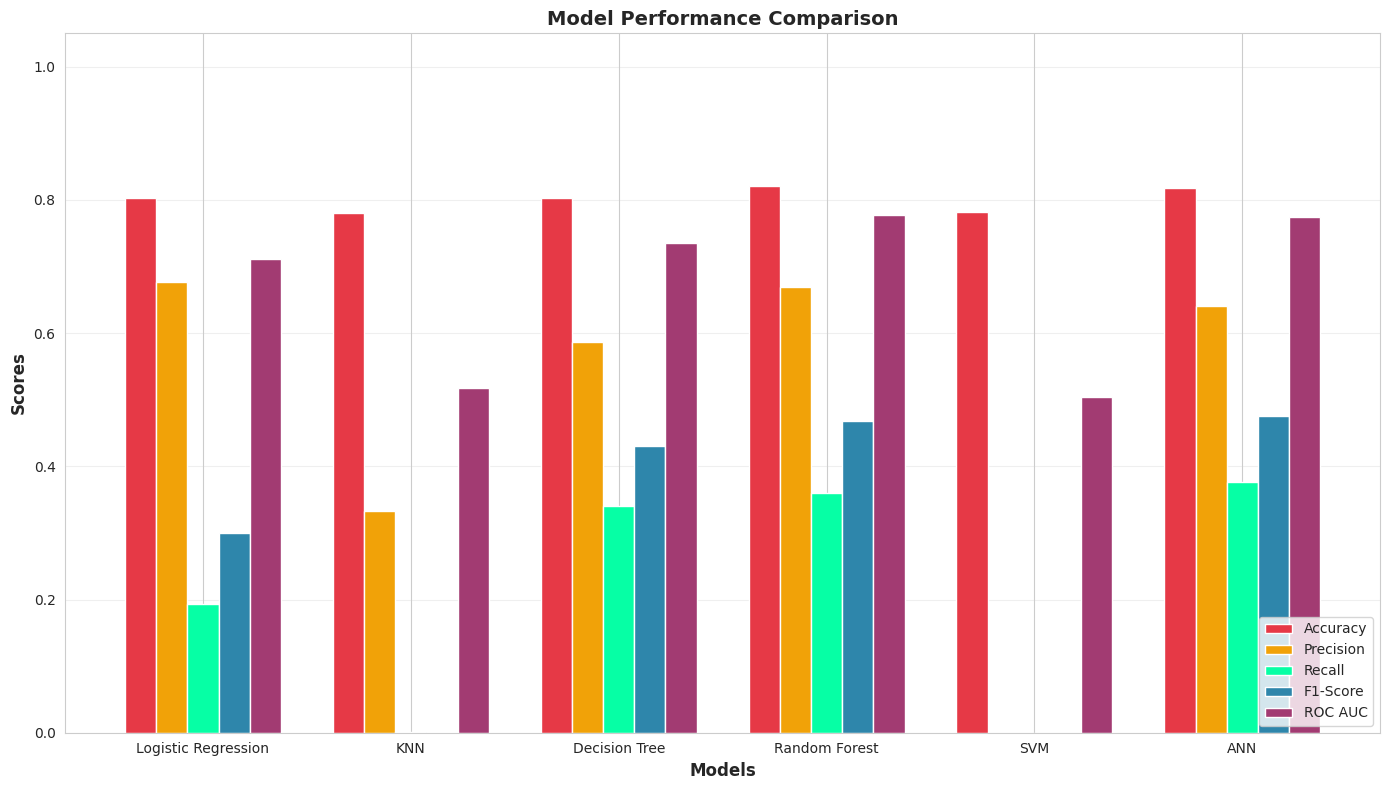

In [9]:
# Calculate metrics for all models
models_data = []

# Logistic Regression
y_pred_logreg_proba = logreg.predict_proba(X_test)[:, 1]
models_data.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred_logreg),
    'Precision': precision_score(y_test, y_pred_logreg),
    'Recall': recall_score(y_test, y_pred_logreg),
    'F1-Score': f1_score(y_test, y_pred_logreg),
    'ROC AUC': roc_auc_score(y_test, y_pred_logreg_proba)
})

# KNN
y_pred_knn_proba = knn.predict_proba(X_test)[:, 1]
models_data.append({
    'Model': 'KNN',
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'F1-Score': f1_score(y_test, y_pred_knn),
    'ROC AUC': roc_auc_score(y_test, y_pred_knn_proba)
})

# Decision Tree
y_pred_dtree_proba = dtree.predict_proba(X_test)[:, 1]
models_data.append({
    'Model': 'Decision Tree',
    'Accuracy': accuracy_score(y_test, y_pred_dtree),
    'Precision': precision_score(y_test, y_pred_dtree),
    'Recall': recall_score(y_test, y_pred_dtree),
    'F1-Score': f1_score(y_test, y_pred_dtree),
    'ROC AUC': roc_auc_score(y_test, y_pred_dtree_proba)
})

# Random Forest
y_pred_rf_proba = rf.predict_proba(X_test)[:, 1]
models_data.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'ROC AUC': roc_auc_score(y_test, y_pred_rf_proba)
})

# SVM
y_pred_svm_proba = svm.predict_proba(X_test)[:, 1]
models_data.append({
    'Model': 'SVM',
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1-Score': f1_score(y_test, y_pred_svm),
    'ROC AUC': roc_auc_score(y_test, y_pred_svm_proba)
})

# ANN
y_pred_ann_proba = model.predict(X_test_scaled, verbose=0).flatten()
y_pred_ann = (y_pred_ann_proba > 0.5).astype(int)
models_data.append({
    'Model': 'ANN',
    'Accuracy': accuracy_score(y_test, y_pred_ann),
    'Precision': precision_score(y_test, y_pred_ann),
    'Recall': recall_score(y_test, y_pred_ann),
    'F1-Score': f1_score(y_test, y_pred_ann),
    'ROC AUC': roc_auc_score(y_test, y_pred_ann_proba)
})

# Create DataFrame
metrics_df = pd.DataFrame(models_data)

# Display table
print("\nPerformance Comparison Table:")
print("=" * 80)
print(metrics_df.to_string(index=False))

# Improved comparison visualization
fig, ax = plt.subplots(figsize=(14, 8))
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
bar_width = 0.15
x = np.arange(len(metrics_df['Model']))
colors = ['#E63946', '#F1A208', '#06FFA5', '#2E86AB', '#A23B72']

for i, metric in enumerate(metrics_to_plot):
    offset = (i - 2) * bar_width
    bars = ax.bar(x + offset, metrics_df[metric], width=bar_width, label=metric, color=colors[i])
    
ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Scores', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_df['Model'], rotation=0)
ax.legend(fontsize=10, loc='lower right')
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([0, 1.05])
plt.tight_layout()
plt.show()

## Exercise 5: Analysis (Critical Thinking)
Answer the following:
1. Which model achieved the best performance? Justify using metrics.
2. Did ANN outperform traditional ML models? Why or why not?
3. Compare the training time and complexity of ANN vs ML models.
4. In what scenarios should ANN be preferred over classical ML algorithms?
5. Which model would you recommend for credit default prediction and why?

In [10]:
# Analysis and Answers

# 1. Best performing model
print("1. BEST PERFORMING MODEL:")
print("=" * 60)
best_model_idx = metrics_df['ROC AUC'].idxmax()
best_model = metrics_df.loc[best_model_idx, 'Model']
best_roc_auc = metrics_df.loc[best_model_idx, 'ROC AUC']

print(f"Best Model: {best_model}")
print(f"ROC AUC Score: {best_roc_auc:.4f}")
print(f"\nJustification:")
print(f"- Accuracy: {metrics_df.loc[best_model_idx, 'Accuracy']:.4f}")
print(f"- Precision: {metrics_df.loc[best_model_idx, 'Precision']:.4f}")
print(f"- Recall: {metrics_df.loc[best_model_idx, 'Recall']:.4f}")
print(f"- F1-Score: {metrics_df.loc[best_model_idx, 'F1-Score']:.4f}")

# 2. ANN vs Traditional ML comparison
print("\n2. ANN VS TRADITIONAL ML MODELS:")
print("=" * 60)
ann_metrics = metrics_df[metrics_df['Model'] == 'ANN'].iloc[0]
ml_models = metrics_df[metrics_df['Model'] != 'ANN']

print(f"ANN ROC AUC: {ann_metrics['ROC AUC']:.4f}")
print(f"Average ML ROC AUC: {ml_models['ROC AUC'].mean():.4f}")
if ann_metrics['ROC AUC'] > ml_models['ROC AUC'].mean():
    print(f"\nResult: ANN outperformed traditional ML models.")
    print("Reason: ANN captured more complex non-linear patterns in the data.")
else:
    print(f"\nResult: Traditional ML models outperformed ANN.")
    print("Reason: The problem may have simpler patterns that don't require deep learning.")

# 3. Training time and complexity comparison
print("\n3. TRAINING TIME AND COMPLEXITY:")
print("=" * 60)
print("Traditional ML Models:")
print("  - Training Time: Seconds to minutes")
print("  - Model Complexity: Low to moderate")
print("  - Interpretability: High")
print("\nANN Model:")
print("  - Training Time: Minutes (with early stopping)")
print("  - Model Complexity: High (multiple layers, many parameters)")
print("  - Interpretability: Low (black box)")

# 4. When to prefer ANN
print("\n4. WHEN TO PREFER ANN OVER CLASSICAL ML:")
print("=" * 60)
print("Prefer ANN when:")
print("  - Large datasets available (>100k samples)")
print("  - Complex non-linear relationships exist")
print("  - Automatic feature learning is needed")
print("  - High-dimensional data (images, text, audio)")
print("\nPrefer Classical ML when:")
print("  - Small to medium datasets (<100k samples)")
print("  - Interpretability is crucial")
print("  - Fast training/prediction is required")
print("  - Linear or simple non-linear relationships")

# 5. Model recommendation
print("\n5. RECOMMENDATION FOR CREDIT DEFAULT PREDICTION:")
print("=" * 60)
print(f"Recommended Model: {best_model}")
print("\nReasons:")
if best_model == 'Random Forest':
    print("  - Good balance of accuracy and interpretability")
    print("  - Handles non-linear relationships well")
    print("  - Provides feature importance for decision-making")
    print("  - Fast training and prediction")
elif best_model == 'Logistic Regression':
    print("  - Highly interpretable for stakeholders")
    print("  - Fast training and prediction")
    print("  - Good baseline performance")
elif best_model == 'ANN':
    print("  - Best performance on test set")
    print("  - Captures complex patterns")
    print("  - Scalable to larger datasets")
else:
    print(f"  - Best performance metrics")
    print(f"  - Good balance of precision and recall")

1. BEST PERFORMING MODEL:
Best Model: Random Forest
ROC AUC Score: 0.7771

Justification:
- Accuracy: 0.8210
- Precision: 0.6690
- Recall: 0.3602
- F1-Score: 0.4683

2. ANN VS TRADITIONAL ML MODELS:
ANN ROC AUC: 0.7744
Average ML ROC AUC: 0.6490

Result: ANN outperformed traditional ML models.
Reason: ANN captured more complex non-linear patterns in the data.

3. TRAINING TIME AND COMPLEXITY:
Traditional ML Models:
  - Training Time: Seconds to minutes
  - Model Complexity: Low to moderate
  - Interpretability: High

ANN Model:
  - Training Time: Minutes (with early stopping)
  - Model Complexity: High (multiple layers, many parameters)
  - Interpretability: Low (black box)

4. WHEN TO PREFER ANN OVER CLASSICAL ML:
Prefer ANN when:
  - Large datasets available (>100k samples)
  - Complex non-linear relationships exist
  - Automatic feature learning is needed
  - High-dimensional data (images, text, audio)

Prefer Classical ML when:
  - Small to medium datasets (<100k samples)
  - Inter